In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
file = h5py.File('balanced_sre_7movies.h5', 'r')

In [2]:
splits = [f for f in file]

In [3]:
splits = sorted(splits, key=lambda x: (int(x.split('chunk')[0]), int(x.split('chunk')[1].split('.')[0])))

In [4]:
movie_ids = set([x[:6] for x in splits])

In [5]:
movie_ids

{'100455', '107883', '115715', '115770', '115777', '115808', '115810'}

In [6]:
clip_speech_probs = {k: [] for k in movie_ids}

In [7]:
file[splits[120]]['clipspeech'][()]

0.9373865

In [8]:
file[splits[120]]['clipnoise'][()].max()

0.1360702

In [9]:
splits[4723]

'100455chunk4723.wav'

In [10]:
clip_speech_probs['115715']

[]

In [11]:
for i in splits: 
    prob = file[i]['clipspeech'][()]
    clip_speech_probs[str(i[:6])].append(prob)

In [12]:
for i in movie_ids:
    print (i, len(np.argwhere(np.array(clip_speech_probs[i]) >= 0.5)) / len(clip_speech_probs[i]))

115715 0.3944214876033058
115777 0.4002041858090863
107883 0.27526652452025585
115810 0.33257090576395243
115770 0.4027256567252617
100455 0.4972480948348857
115808 0.4714181464363902


In [13]:
for k, v in clip_speech_probs.items():
    print ('Average speech probability for movie with ID', k, ':', np.mean(v))

Average speech probability for movie with ID 115715 : 0.368863
Average speech probability for movie with ID 115777 : 0.37110344
Average speech probability for movie with ID 107883 : 0.25951153
Average speech probability for movie with ID 115810 : 0.31444517
Average speech probability for movie with ID 115770 : 0.36927742
Average speech probability for movie with ID 100455 : 0.466312
Average speech probability for movie with ID 115808 : 0.4404195


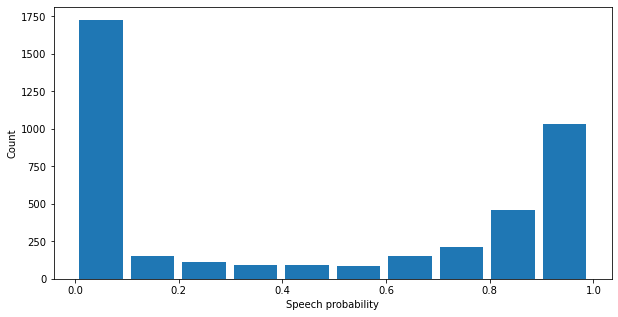

In [14]:
plt.figure(figsize=(10,5))
#plt.title('Speech probability histogram for the movie with id 115808')
plt.xlabel('Speech probability')
plt.ylabel('Count')
plt.hist(clip_speech_probs['115808'], rwidth=0.85);
plt.savefig("115808.png")

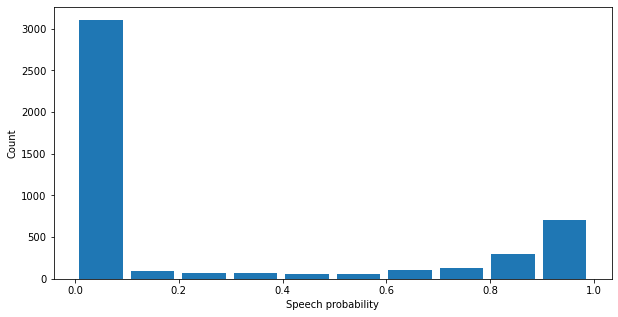

In [15]:
plt.figure(figsize=(10,5))
#plt.title('Speech probability histogram for the movie with id 107883')
plt.xlabel('Speech probability')
plt.ylabel('Count')
plt.hist(clip_speech_probs['107883'], rwidth=0.85);
plt.savefig("107883.png")

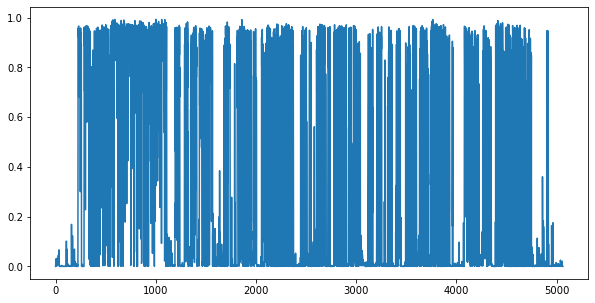

In [16]:
plt.figure(figsize=(10,5))
plt.plot(clip_speech_probs['115770'])

In [17]:
def get_subtitles(movie_name):
    filename= '/scratch/elec/puhe/p/momaf/scripts/audiotag_panns/results_50s/' + movie_name + '.srt'
    with open(filename) as f:
        lines = f.readlines()
    desired_lines = lines[2::4]
    
    speech_tags = []
    for i, j in enumerate(desired_lines):
        if j.split('--')[0] == 'Speech':
            speech_tags.append(i)
            
    return speech_tags

In [18]:
def jaccard_similarity(movie_name, threshold):
    return len(set(get_subtitles(movie_name)) & set(np.argwhere(np.array(clip_speech_probs[movie_name[:6]]) >= threshold).flatten())) / len(set(get_subtitles(movie_name)) | set(np.argwhere(np.array(clip_speech_probs[movie_name[:6]]) >= threshold).flatten()))

In [19]:
jaccard_similarity('115777-TaasTyttoKadoksissa-1957', 0.5)

0.7368672397325693

In [20]:
jaccard_similarity('115808-VaapelinKauhu-1957', 0.5)

0.7298761609907121

In [21]:
jaccard_similarity('115810-Ylijaamanainen-1951', 0.5)

0.6814744801512287

In [22]:
jaccard_similarity('115770-RatavartijanKaunisInkeri-1950', 0.5)

0.7075208913649025

In [23]:
jaccard_similarity('115715-KaikkienNaistenMonni-1952', 0.5)

0.6666666666666666

In [24]:
jaccard_similarity('100455-Heirillumarei-1954', 0.5)

0.726418152350081

In [25]:
jaccard_similarity('107883-PoikaEliKesaansa-1955', 0.5)

0.6675461741424802